Ucitavanje biblioteka

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from dotenv import load_dotenv
load_dotenv()

True

Učitavanje i prikazivanje podataka iz csv datoteke.

In [68]:
#file = os.environ.get("FILE")
file = os.environ.get("RAW_DATA_FILE")
podaci = pd.read_csv(f'{file}')
#podaci[['Crash Year','Crash Month','Crash Day','Time of Day','Day of Week','City or Township','Crash: Intersection','Crash: Hit-and-Run','Lighting Conditions','Weather Conditions','Speed Limit at Crash Site','Imputed_Speed Limit at Crash Site','Worst Injury In Crash','Person Age','Imputed_Person Age','Person Gender','ADI Impute Column','Column 2']].describe()
#podaci[podaci.columns]
podaci[['Crash Year','Crash Month','Crash Day','Time of Day','Day of Week','City or Township','Crash: Intersection','Crash: Hit-and-Run','Lighting Conditions','Weather Conditions (2016+)','Speed Limit at Crash Site','Worst Injury in Crash','Party Type','Person Age','Person Gender']].describe()

,Crash Year,Crash Day
count,6809.000000,6809.000000
mean,2013.992216,15.384197
std,2.597471,8.701025
min,2010.000000,1.000000
25%,2012.000000,8.000000
50%,2014.000000,15.000000
75%,2016.000000,23.000000
max,2018.000000,31.000000


In [69]:
podaci.describe(include='object')

,Crash Month,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
count,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809
unique,12,25,7,43,2,2,8,10,15,5,1,87,3
top,October,6:00 PM - 7:00 PM,Friday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Daylight,Uncoded & errors,25,Possible injury (C),Motor vehicle driver,DOB invalid,Male
freq,695,535,1078,4543,3852,4300,3630,4613,2233,2489,6809,2470,2905


informacija o podacima (tipovi, nedostajuće vrijednosti)

In [70]:
podaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Crash Year                  6809 non-null   int64 
 1   Crash Month                 6809 non-null   object
 2   Crash Day                   6809 non-null   int64 
 3   Time of Day                 6809 non-null   object
 4   Day of Week                 6809 non-null   object
 5   City or Township            6809 non-null   object
 6   Crash: Intersection         6809 non-null   object
 7   Crash: Hit-and-Run          6809 non-null   object
 8   Lighting Conditions         6809 non-null   object
 9   Weather Conditions (2016+)  6809 non-null   object
 10  Speed Limit at Crash Site   6809 non-null   object
 11  Worst Injury in Crash       6809 non-null   object
 12  Party Type                  6809 non-null   object
 13  Person Age                  6809 non-null   obje

Provjera neispravnih vrijednosti u setu podataka i ispravljanje istih

In [71]:

print(podaci['Speed Limit at Crash Site'].unique())

['35' '30' '25' '45' '15' 'Uncoded & errors' '40' '20' '55' '5' '70' '50'
 '10' '65' '60']


In [72]:
podaci['Speed Limit at Crash Site'] = podaci['Speed Limit at Crash Site'].str.replace('Uncoded & errors', '-1')
podaci['Speed Limit at Crash Site'] = podaci['Speed Limit at Crash Site'].astype('int')
print(podaci['Speed Limit at Crash Site'].unique())

[35 30 25 45 15 -1 40 20 55  5 70 50 10 65 60]


In [73]:
print(podaci['Person Age'].unique)

<bound method Series.unique of 0       DOB invalid
1                44
2       DOB invalid
3       DOB invalid
4       DOB invalid
           ...     
6804    DOB invalid
6805             22
6806    DOB invalid
6807    DOB invalid
6808             55
Name: Person Age, Length: 6809, dtype: object>


In [74]:
podaci['Person Age'] = podaci['Person Age'].str.replace('DOB invalid', '-1')
podaci['Person Age'] = podaci['Person Age'].str.replace('Less than 1 year old', '0')
podaci['Person Age'] = podaci['Person Age'].astype('int')
print(podaci['Person Age'])

0       -1
1       44
2       -1
3       -1
4       -1
        ..
6804    -1
6805    22
6806    -1
6807    -1
6808    55
Name: Person Age, Length: 6809, dtype: int32


provjera nedostajućih vrijednosti

In [75]:
print(podaci.isna().sum())

Crash Year                    0
Crash Month                   0
Crash Day                     0
Time of Day                   0
Day of Week                   0
City or Township              0
Crash: Intersection           0
Crash: Hit-and-Run            0
Lighting Conditions           0
Weather Conditions (2016+)    0
Speed Limit at Crash Site     0
Worst Injury in Crash         0
Party Type                    0
Person Age                    0
Person Gender                 0
dtype: int64


Provjera ponavljajućih vrijednosti

In [77]:
podaci_duplicates = podaci.duplicated()
print(podaci_duplicates.value_counts())

False    6809
dtype: int64


Nakon što je odrađena provjera podataka, možemo krenuti na analizu

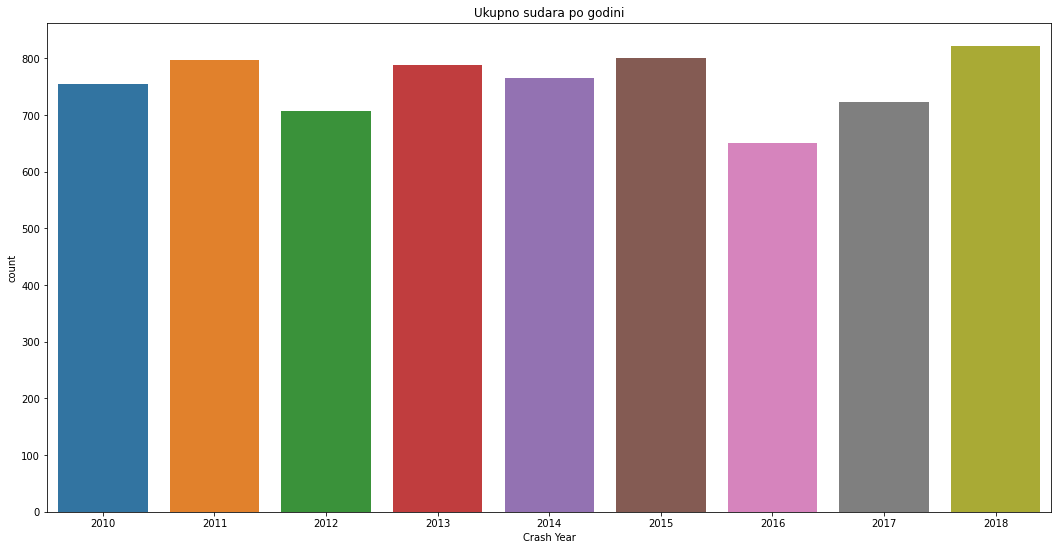

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x='Crash Year', data=podaci)
#ax.bar_label(ax.containers[0])
plt.title("Ukupno sudara po godini")
plt.show()
plt.clf()